# Task 1
Load the data and explore them, showing size, structure and histograms of numeric data;

show the histogram of the frequencies of the target labels, contained in the “language” column

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = "data.csv"
df = pd.read_csv(dataset_path)
print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.sample(5)

the dataset has 329 rows and 13 columns


,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
44,FR,11.927053,-10.773460,6.575888,8.153576,-5.505326,14.295971,-11.396879,4.593266,0.000701,-5.430002,4.872316,-7.151154
83,GE,-2.020461,1.111298,-2.107064,6.896539,-3.377759,10.684334,-10.489573,5.184497,-2.244897,-1.704590,3.565678,-2.529994
250,US,1.876146,-4.790968,7.706085,3.479158,4.455274,2.352220,-7.040896,8.803352,-7.426813,6.982098,-3.748971,0.229070
304,US,5.584831,-4.220978,0.319859,11.337342,-5.641402,11.263265,-9.859562,2.512329,-0.478526,-0.931808,3.927747,-6.953571
313,US,8.069892,-2.808266,-2.765567,8.531399,-7.521643,9.430720,-8.172275,4.477560,1.791541,-3.922345,3.440595,-2.014424


In [58]:
df.describe(include="all")

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,NaN,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,NaN,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,NaN,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,NaN,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,NaN,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658


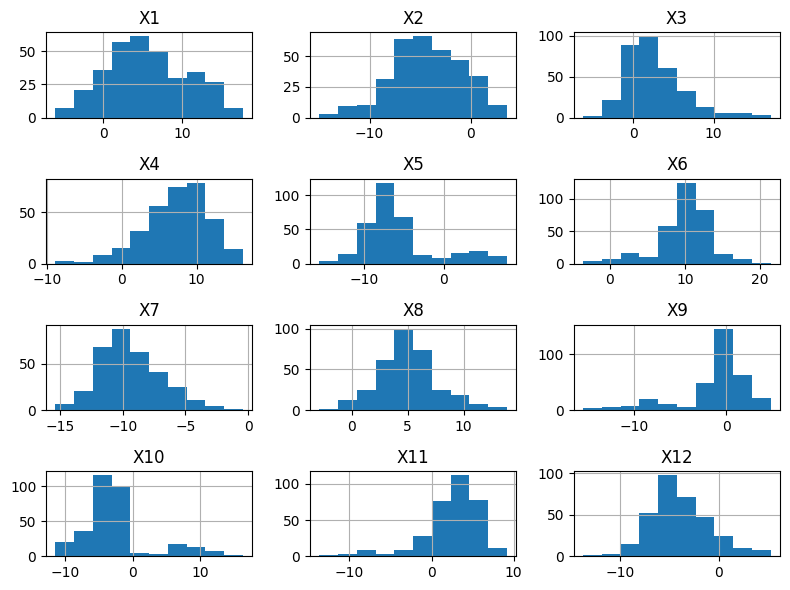

In [13]:
df.select_dtypes(include="number").hist(figsize=(8,6))
plt.tight_layout()

<Axes: >

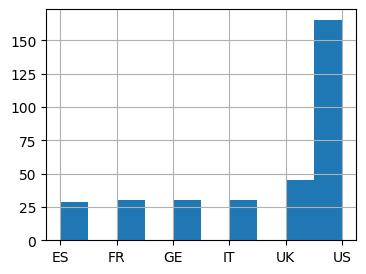

In [53]:
target = "language"
df[target].hist(figsize=(4,3))

<Axes: >

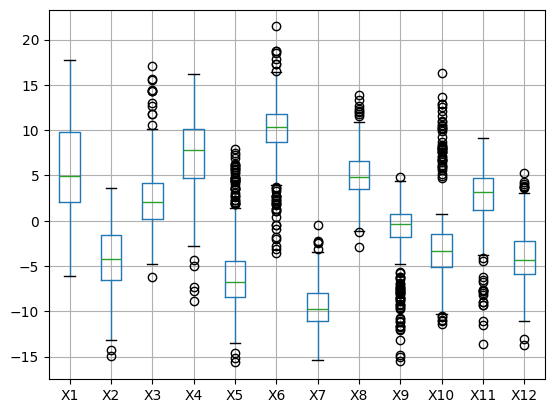

In [54]:
df.boxplot()

<Axes: >

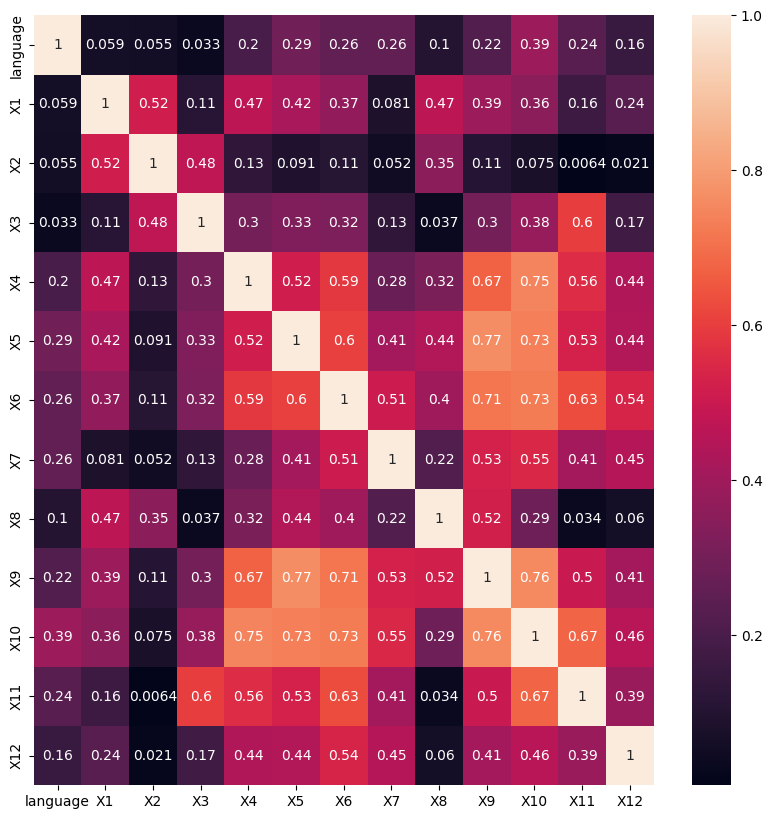

In [68]:
from sklearn.preprocessing import LabelEncoder

df_numeric = df.copy()
df_numeric[target] = LabelEncoder().fit_transform(df_numeric[target])

corr = df_numeric.select_dtypes(include="number").corr().abs()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

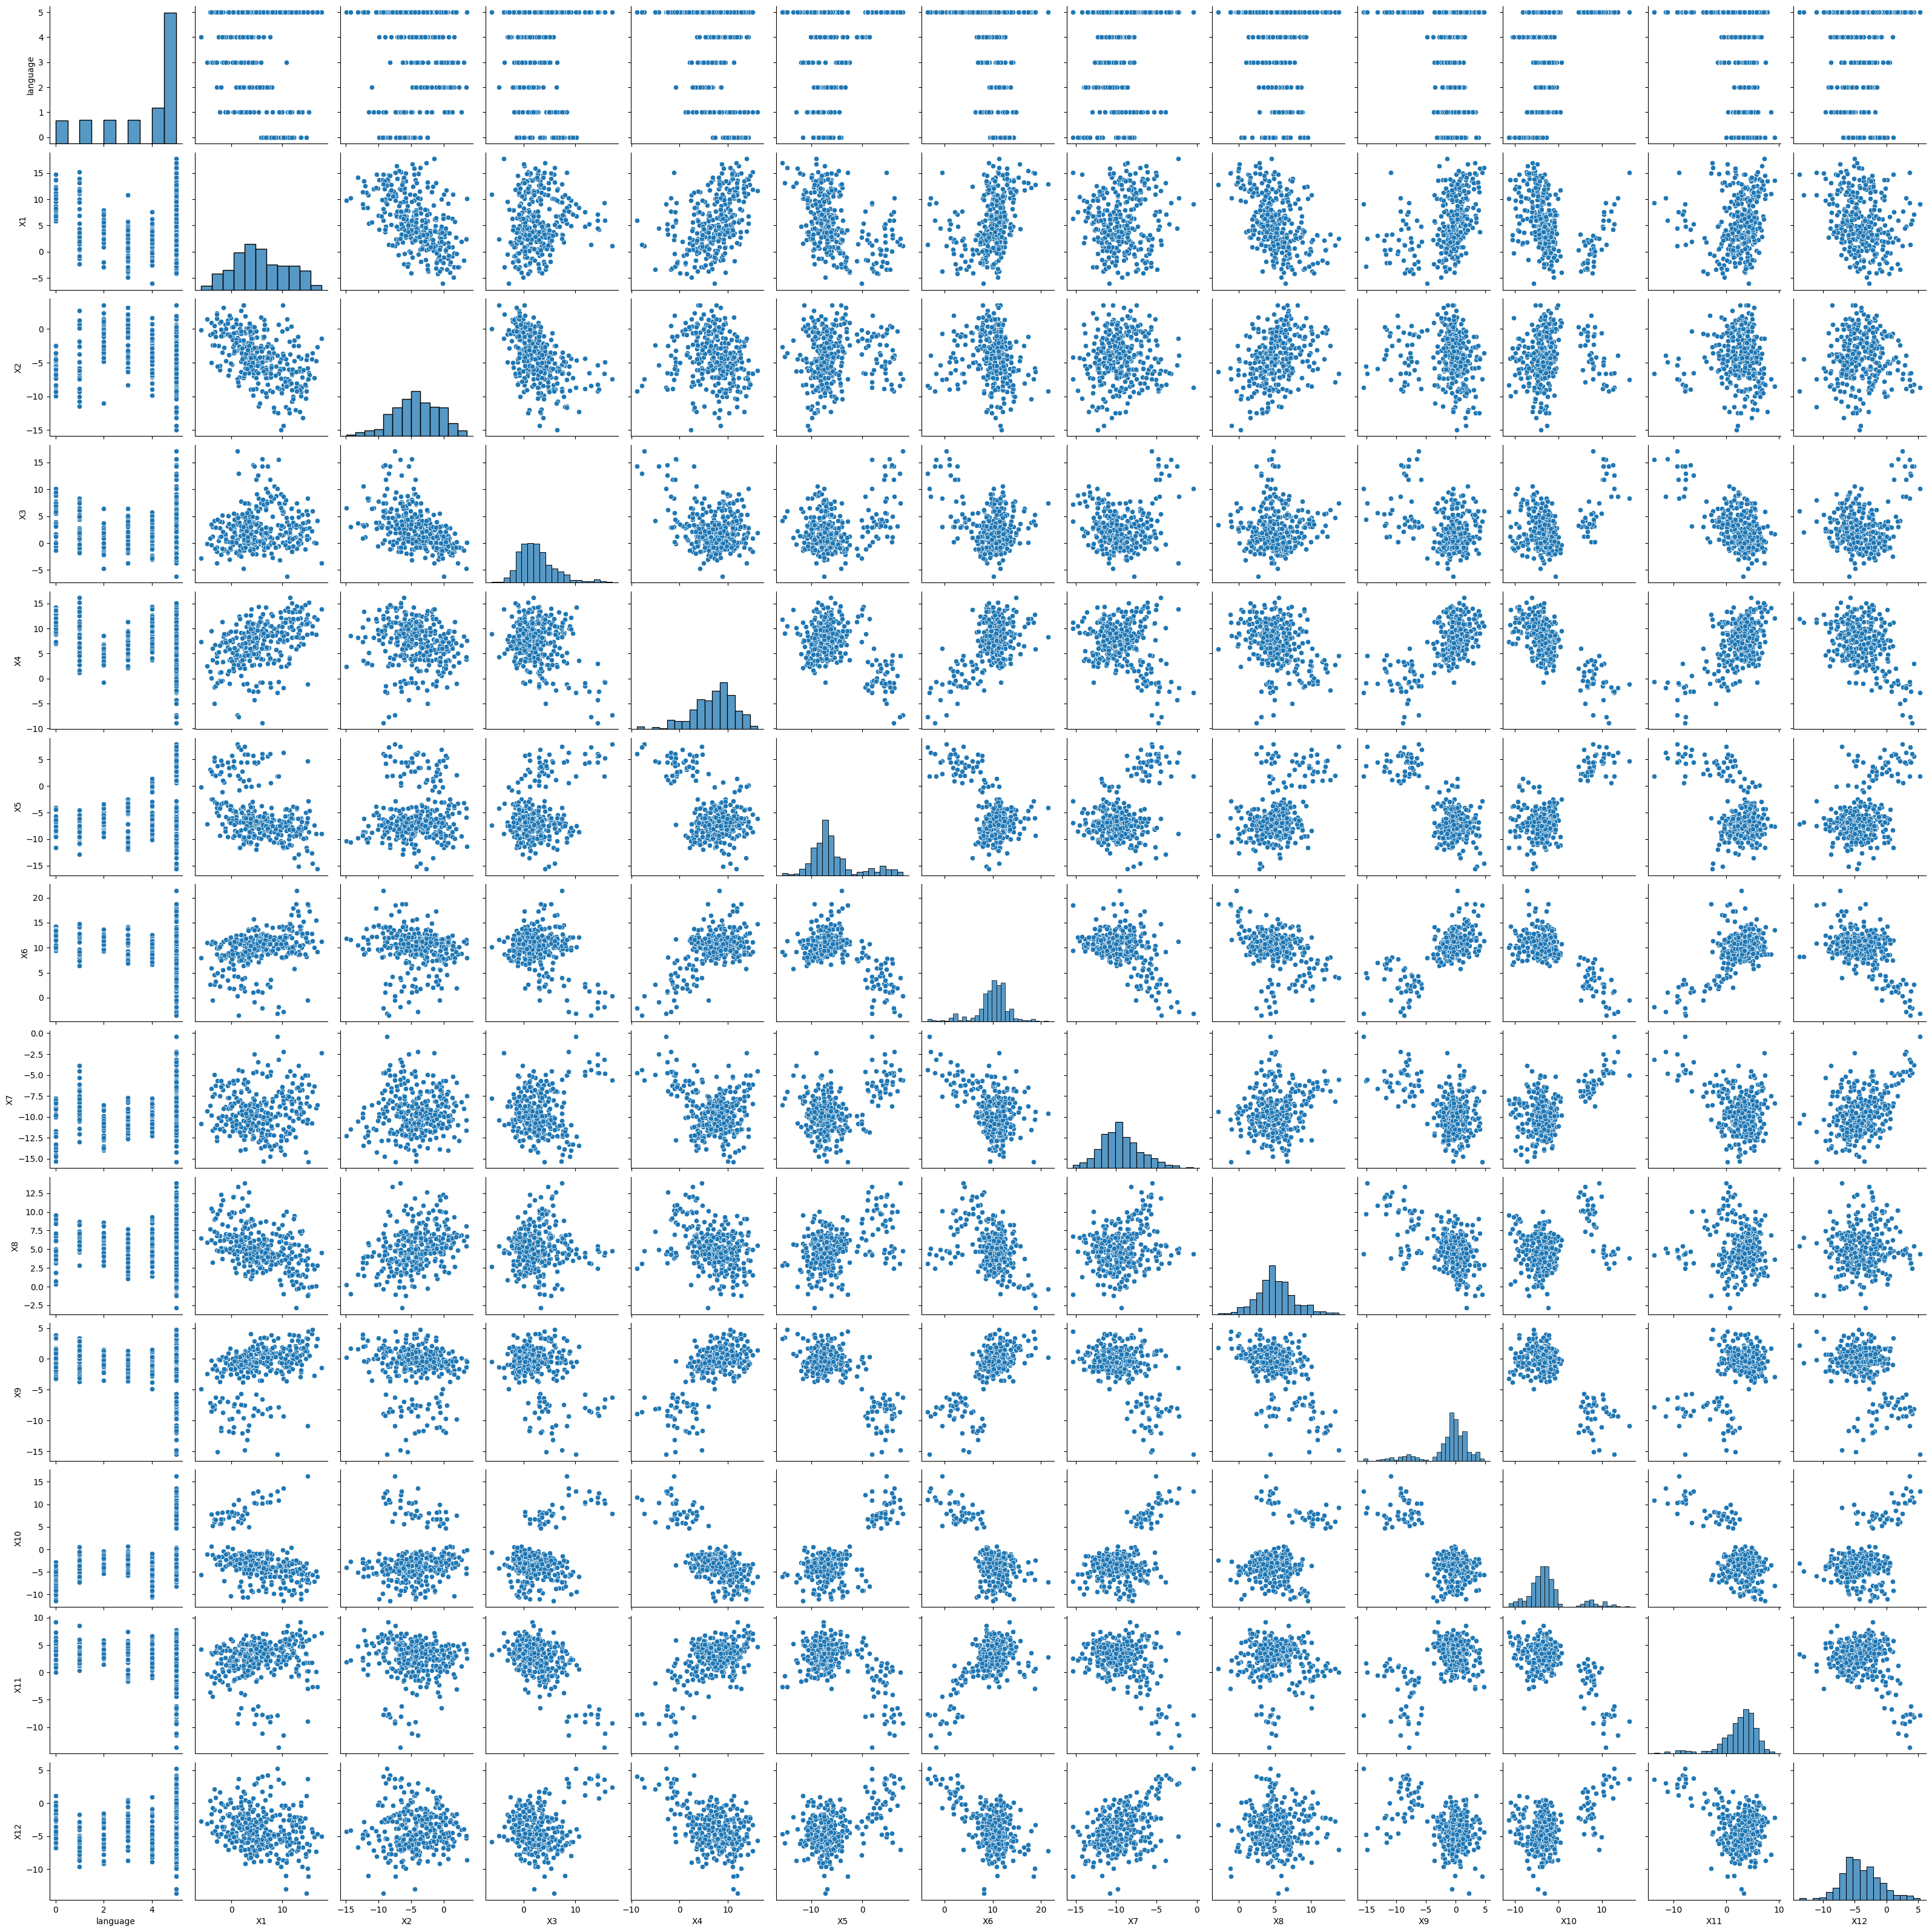

In [69]:
sns.pairplot(df_numeric)

# Task 2 
Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values, features that seem not to be relevant 

From the data exploration we can notice a few things:
- looking at the counts present in the description of the dataset, the only feature with some missing values is X10 (321/329)
- looking at the boxplot we notice that basically every feature apart from X1 is affected by outliers
- looking at the histograms of the features we notice that their distributions are more or less balanced
- looking at the histogram of the target we notice a heavy majority of "US" label
- looking at the correlation heatmap we can notice that some features are heavily correlated with each other (for example X9 with X10). This might mean that they are redundant

# Task 3
Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning

In [71]:
df2 = df.copy()

print(f"before cleaning the dataset had {df2.shape[0]} rows and {df2.shape[1]} columns")
df2 = df2.dropna()
print(f"after cleaning the dataset has {df2.shape[0]} rows and {df2.shape[1]} columns")

before cleaning the dataset had 329 rows and 13 columns
after cleaning the dataset has 321 rows and 13 columns


# Task 4

Model1: tune the hyper–parameters of a classifier with Cross Validation, optimize for recall without considering the frequencies of class labels

In [78]:
# chiaramente per poter valutare il mio modello devo fare uno split tra train e test set
from sklearn.model_selection import train_test_split

X = df2.drop(target, axis=1)
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 12), (65, 12), (256,), (65,))

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

scoring = "recall_macro"
folds = 3
params = {
    "max_depth": list(range(2,11))
}

grid1 = GridSearchCV(
    DecisionTreeClassifier(),
    params,
    scoring=scoring,
    cv=folds
)
grid1.fit(X_train, y_train)
y_pred = grid1.predict(X_test)

print(f"{grid1.best_params_}")

{'max_depth': 8}


# Task 5
produce a classification report for Model1

In [92]:
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

          ES       0.58      1.00      0.74         7
          FR       0.56      0.56      0.56         9
          GE       0.62      0.83      0.71         6
          IT       0.33      0.17      0.22         6
          UK       0.57      0.44      0.50         9
          US       0.73      0.68      0.70        28

    accuracy                           0.63        65
   macro avg       0.57      0.61      0.57        65
weighted avg       0.62      0.63      0.62        65



# Task 6
display the confusion matrix for Model1, normalised with respect to true values

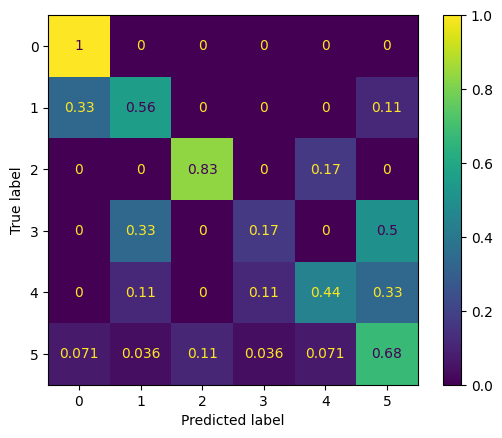

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred, normalize="true")
cmd1 = ConfusionMatrixDisplay(cm1)

cmd1.plot()

# Task 7

Model2: tune the hyper–parameters of another classifier with Cross Validation, optimize for recall without considering the frequencies of class
labels

In [99]:
from sklearn.neighbors import KNeighborsClassifier

scoring = "recall_macro"
folds = 3
params = {
    "n_neighbors": list(range(2,8))
}

grid2 = GridSearchCV(
    KNeighborsClassifier(),
    params,
    scoring=scoring,
    cv=folds
)
grid2.fit(X_train, y_train)
y_pred2 = grid2.predict(X_test)

print(f"{grid2.best_params_}")

{'n_neighbors': 2}


# Task 8

produce a classification report for Model2 

In [100]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

          ES       0.88      1.00      0.93         7
          FR       0.82      1.00      0.90         9
          GE       0.62      0.83      0.71         6
          IT       1.00      0.67      0.80         6
          UK       0.54      0.78      0.64         9
          US       0.95      0.71      0.82        28

    accuracy                           0.80        65
   macro avg       0.80      0.83      0.80        65
weighted avg       0.84      0.80      0.80        65



# Task 9

display the confusion matrix for Model2, normalised with respect to true values

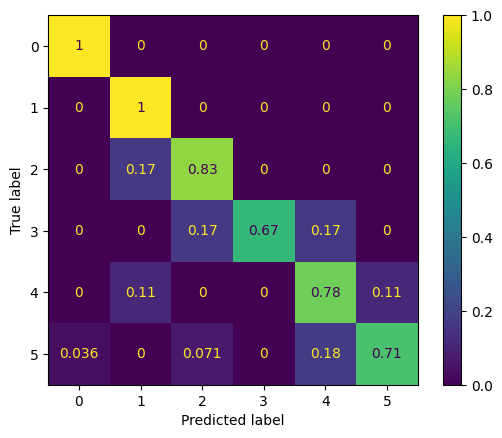

In [101]:
cm2 = confusion_matrix(y_test, y_pred2, normalize="true")
cmd2 = ConfusionMatrixDisplay(cm2)

cmd2.plot()

# Task 10
comment the comparison between the results of the two models 

Le performance di KNN classifier sono decisamente migliori rispetto a quelle di DT across the board, non solo considerando il recall.

Questo suggerisce che la struttura del dataset favorisca un approccio basato sulla distanza tra i datapoint piuttosto che agli split dei DT. In particolare, sembra che le classi non siano facilmente separabili tramite soglie sulle singole feature (iperpiani orizzontali/verticali). KNN può modellare decision surfaces non lineari e in questo caso sembra essere più efficace